## Homework

1. Download and plot 3 apparently related sets of data with at least. Each set should contain at least two related variables. You should explain *how* variables in each set of data are related. Plot each set using the scatter plot function *and* the line graph function. For example, you might the obseved rate of unemployement and the natural rate of unemployment in the same graph. To find data, search for data at FRED and use the code associated with the data. For example, the [CPI measure that includes urban items](https://fred.stlouisfed.org/series/CPIAUCSL) is identified by the code, *CPIAUCSL*.

2. Create a correlation matrix for quarterly observations of Nominal GDP, Real GDP, the Price Level (CPI or GDP Deflator), the quantity of currency in circulation and the federal funds rate for as large of a date range as possible. Then, calculate the year-over-year percent change for each each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.

How has the correlation between each variable changed? Why do you think the correlation changes after calculate the year-over-year percent change?

In [1]:
import requests, pandas as pd, matplotlib as mpl, numpy as np, os, dotenv, yfinance as yf
import pandas_datareader.data as pdr, datetime
from matplotlib import pyplot as plt
from dotenv import load_dotenv
from fredapi import Fred
load_dotenv()
fred = Fred(api_key=os.getenv('FRED_KEY'))

In [2]:
# This function uses color for dimension

def color_heatmap(df, pp):
    COLOR = 'olivedrab'
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    mpl.rcParams['font.size'] = 40
    for key1 in df:
        for key2 in df:
            # Do not use the same variables for the x and y axes.
            if key1 != key2:
                for key3 in df:
                    # if key1 or key2 is == key3, do not create
                    if key1 != key3 and key2 != key3:
                        fig, ax = plt.subplots(figsize=(30, 20))
                        df.plot.scatter(x=key1,
                                        y=key2,
                                        colormap='viridis',
                                        c=key3,
                                        s=50,
                                        alpha=.7,
                                        ax=ax)
                        # remove tick lines
                        plt.setp(ax.get_xticklines(), visible=False)
                        plt.setp(ax.get_yticklines(), visible=False)
                        # show fig
                        plt.show()
                        # save fig
                        pp.savefig(fig, bbox_inches='tight')
                        # close fig
                        plt.close()

In [3]:
gdp_search = fred.search('GDPc1')
gdp_search

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
GDPC1,Quarterly,Q,GDPC1,2023-02-23 07:53:02-06:00,BEA Account Code: A191RX Real gross domestic ...,2022-10-01,1947-01-01,92,2023-03-01,2023-03-01,Seasonally Adjusted Annual Rate,SAAR,Real Gross Domestic Product,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $


# Real GDP and Growth
Real GDP and its growth rate are related since the percent change is calculated using last year's quarter and this year's corresponding quarter. Having these two charts side-by-side helps the user understand the gravity of the % change from each year. 

<Axes: title={'center': 'Quarterly Real GDP ($ Bil) and Percent Change from Quarter one Year Ago (%)'}>

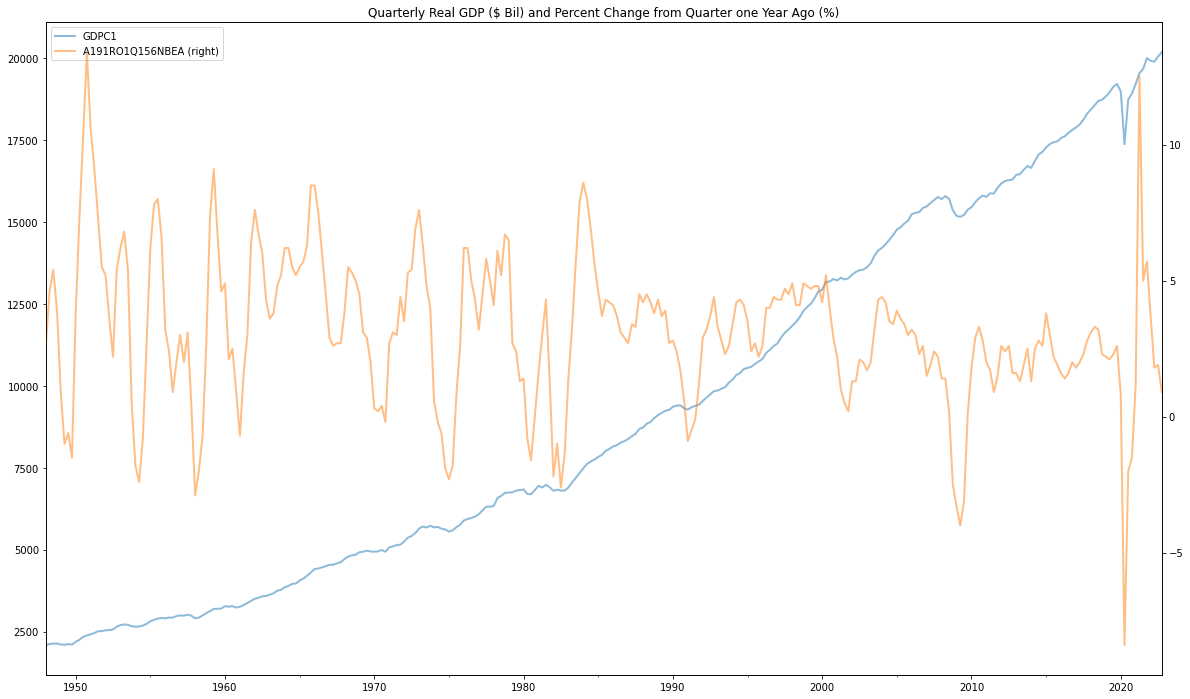

In [4]:
df = pd.DataFrame({series:fred.get_series(series) for series in ['GDPC1', 'A191RO1Q156NBEA']})
df = df.dropna(how="any")
# gdp_df = fred.get_series(series_id='GDPC1')
df.plot(figsize=(20,12),
        title='Quarterly Real GDP ($ Bil) and Percent Change from Quarter one Year Ago (%)',
        secondary_y= 'A191RO1Q156NBEA',
        linewidth = 2,
        alpha=.5)

In [5]:
df['x1'] = df.index
df

,GDPC1,A191RO1Q156NBEA,x1
1948-01-01,2087.442,2.6,1948-01-01
1948-04-01,2121.899,4.6,1948-04-01
1948-07-01,2134.056,5.4,1948-07-01
1948-10-01,2136.440,3.9,1948-10-01
1949-01-01,2107.001,0.9,1949-01-01
...,...,...,...
2021-10-01,20006.181,5.7,2021-10-01
2022-01-01,19924.088,3.7,2022-01-01
2022-04-01,19895.271,1.8,2022-04-01
2022-07-01,20054.663,1.9,2022-07-01


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='GDPC1', ylabel='A191RO1Q156NBEA'>

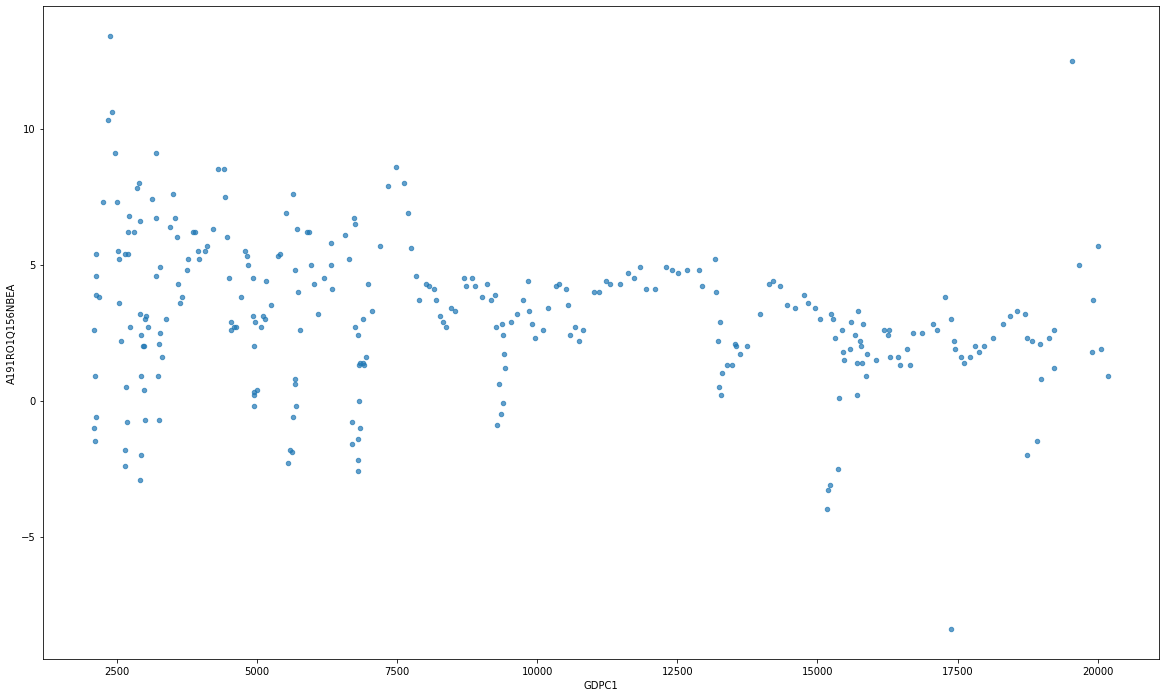

In [6]:
df.plot.scatter(figsize=(20,12),
                x='GDPC1',
                y='A191RO1Q156NBEA',
                secondary_y='x1',
                colormap='viridis',
                alpha=.7)

# SP500 and GDP
It makes sense that when the economy is expanding that the top companies in America would also be increasing in market value and vice versa. This is because GDP is representative of spending in the U.S. and as a consumer economy, when spending is going up then the value of the income streams from those stocks should also be going up.

##### Had trouble getting the data in Quarterly format so used parser instead
df2 = pd.DataFrame({series:fred.get_series(series) for series in ['GDPC1', 'NASDAQCOM']})
 gdp_df = fred.get_series(series_id='GDPC1')
df2.plot(figsize=(20,12),
        title='Quarterly Real GDP ($ Bil) and Percent Change from Quarter one Year Ago (%)',
        linewidth = 2,
        alpha=.5)

In [7]:
data_codes = {"NASDAQ Composite Index":"NASDAQCOM",
              "Real Gross Domestic Product": "GDPC1"}
def gather_data(data_codes,start,end=datetime.datetime.today(),
                freq='Q'):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            df = pdr.DataReader(
            code, "fred", start, end).resample(freq).mean() #.first() or .last()
            df.rename(columns = {code:key}, inplace=True)
            df_init = True
        else:
            df[key] = pdr.DataReader(
            code, "fred", start, end).resample(freq).mean()
    return df
start = datetime.datetime(1900,1,1)
df2 = gather_data(data_codes, start, freq = 'Q')

<Axes: xlabel='DATE'>

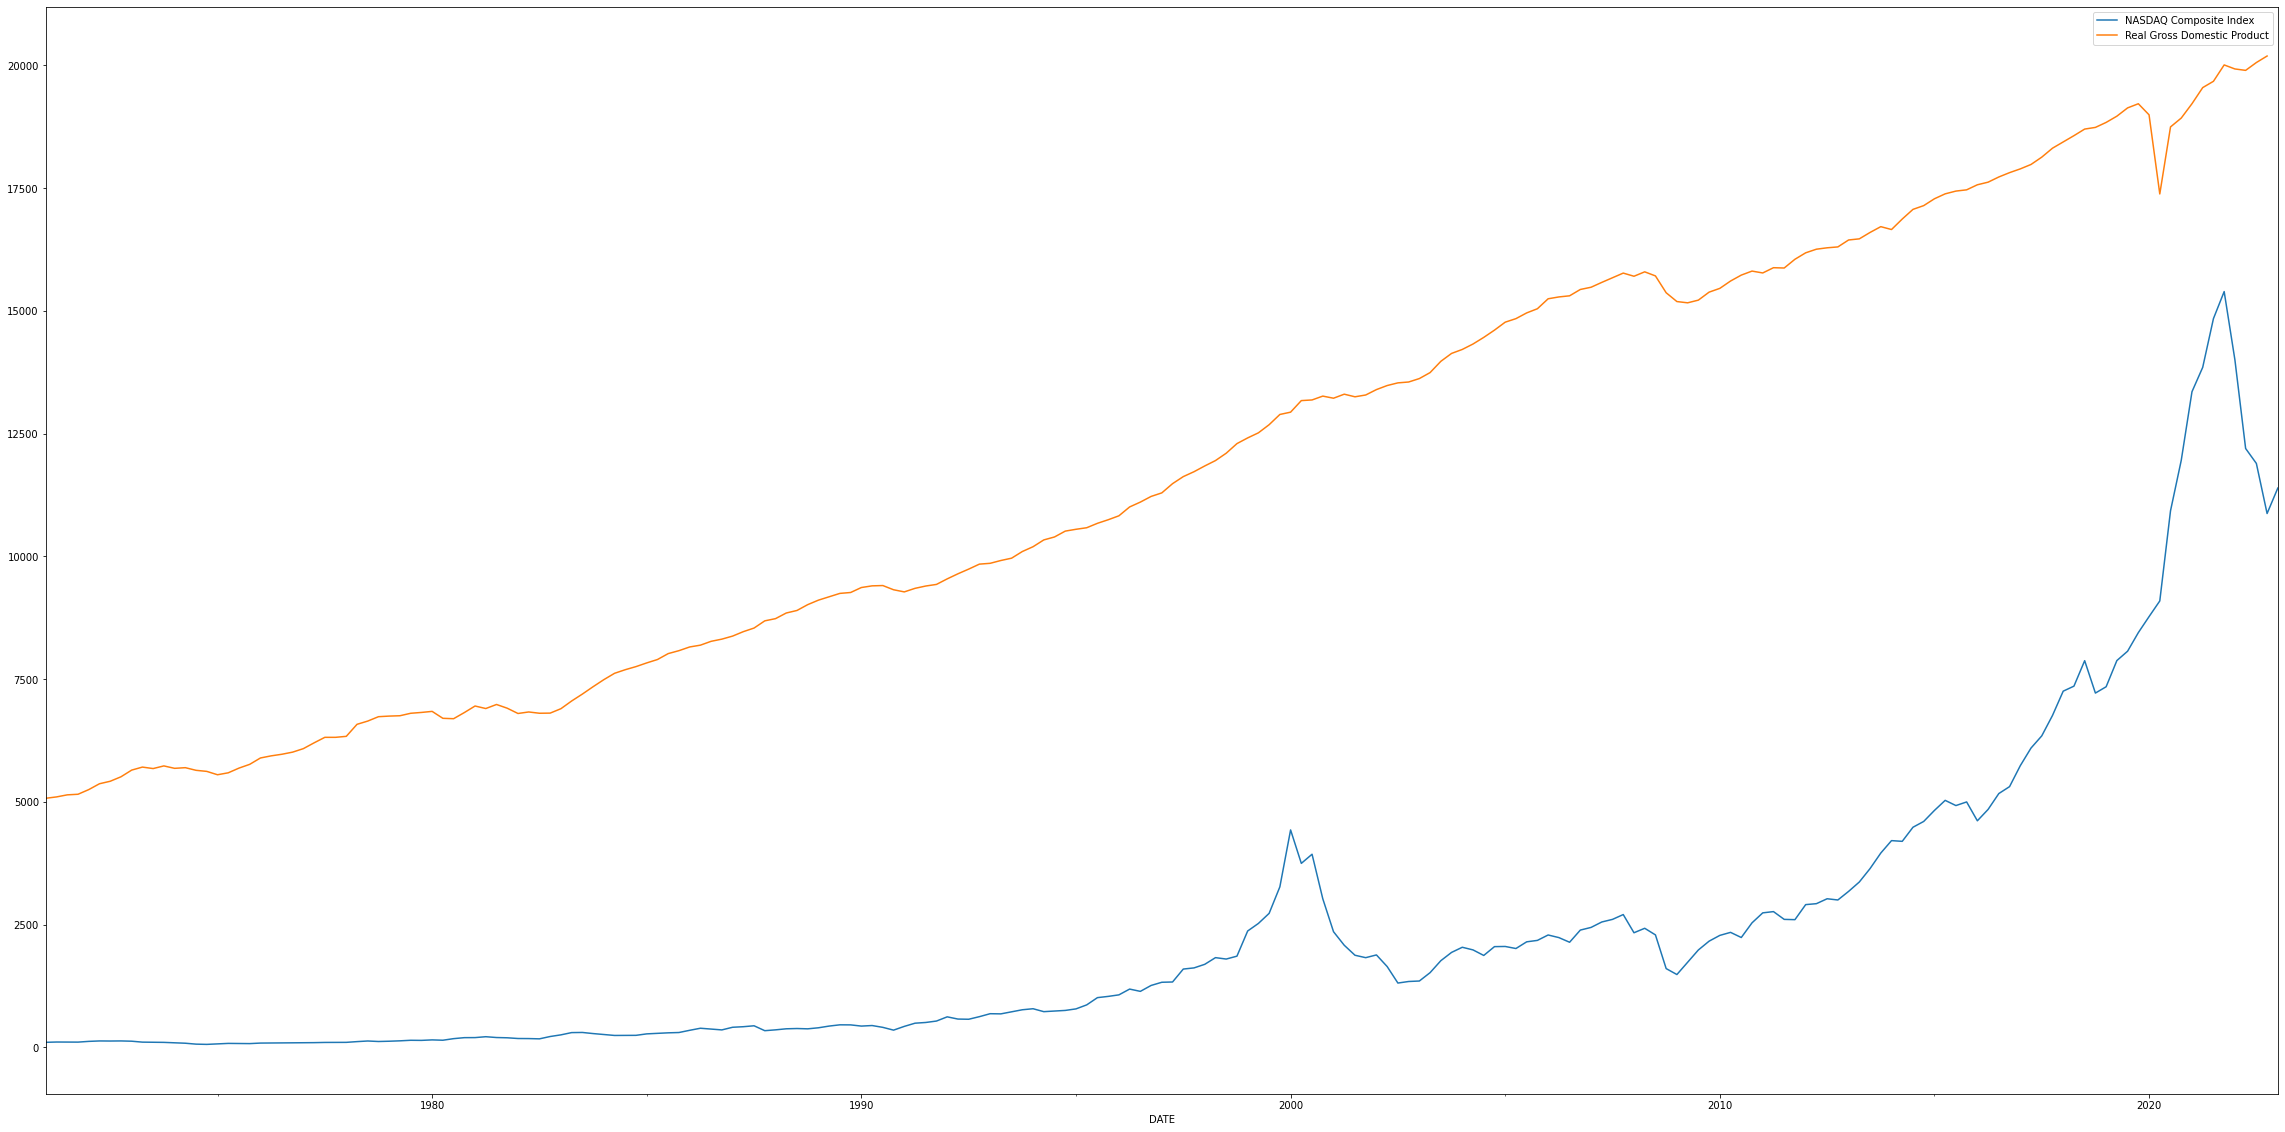

In [8]:
df2.plot.line(figsize=(40,20))

In [9]:
df2

,NASDAQ Composite Index,Real Gross Domestic Product
DATE,,
1971-03-31,103.086053,5072.996
1971-06-30,109.215238,5100.447
1971-09-30,108.416562,5142.422
1971-12-31,107.307500,5154.547
1972-03-31,122.329524,5249.337
...,...,...
2022-03-31,14000.619839,19924.088
2022-06-30,12195.240000,19895.271
2022-09-30,11891.069844,20054.663


<Axes: title={'center': 'GDP v. Nasdaq Correlation Scatterplot'}, xlabel='NASDAQ Composite Index', ylabel='Real Gross Domestic Product'>

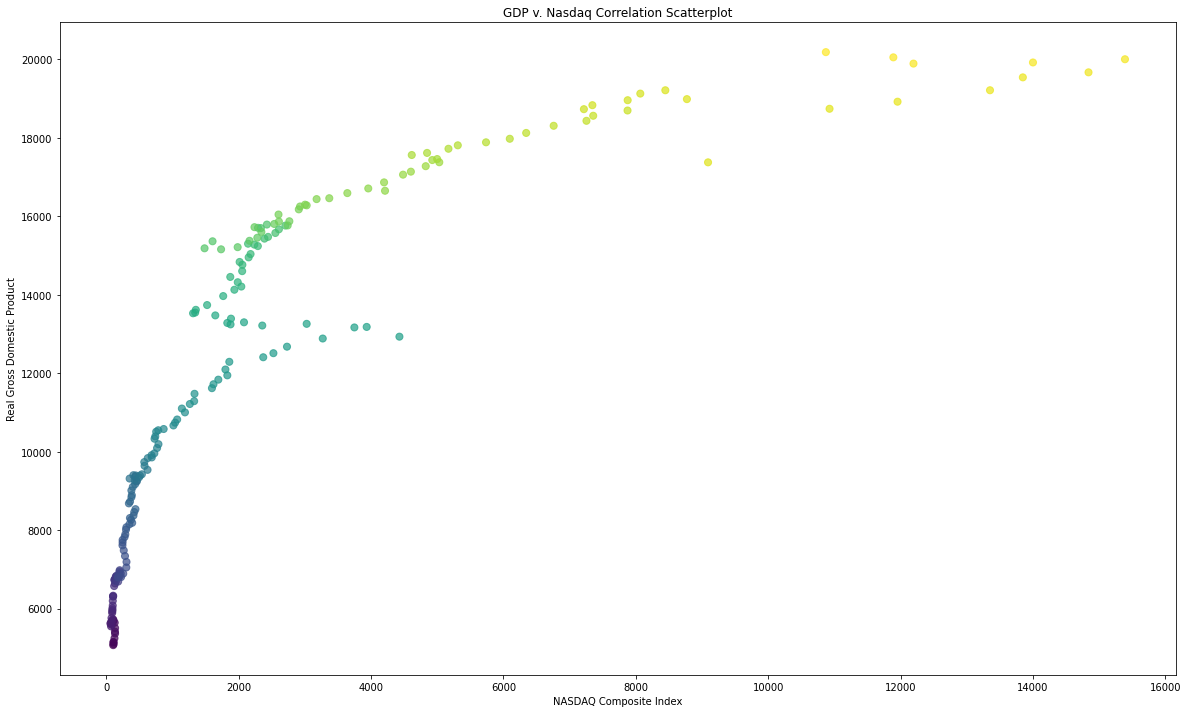

In [10]:
df2.plot.scatter(title='GDP v. Nasdaq Correlation Scatterplot',
                 figsize=(20,12),
                x=df2.columns[0],
                y=df2.columns[1],
                colormap='viridis',
                c=df2.index,
                s=50,
                alpha=.7)

# VIX v. U.S. National Home Price Index

Period of high volatility could play out in the financial markets and ultimately impact national home prices.

In [11]:
data_codes = {"CBOE Volatility Index: VIX":"VIXCLS",
              "DS&P/Case-Shiller U.S. National Home Price Index": "CSUSHPINSA"}
start = datetime.datetime(1997,1,1)
df3 = gather_data(data_codes, start, freq = 'M')
df3.dropna(how='any')

,CBOE Volatility Index: VIX,DS&P/Case-Shiller U.S. National Home Price Index
DATE,,
1997-01-31,19.473333,83.530
1997-02-28,20.139474,83.596
1997-03-31,20.170000,83.911
1997-04-30,19.662273,84.320
1997-05-31,19.924762,84.863
...,...,...
2022-08-31,22.169565,303.662
2022-09-30,27.341818,300.532
2022-10-31,30.005714,298.866


<Axes: xlabel='DATE'>

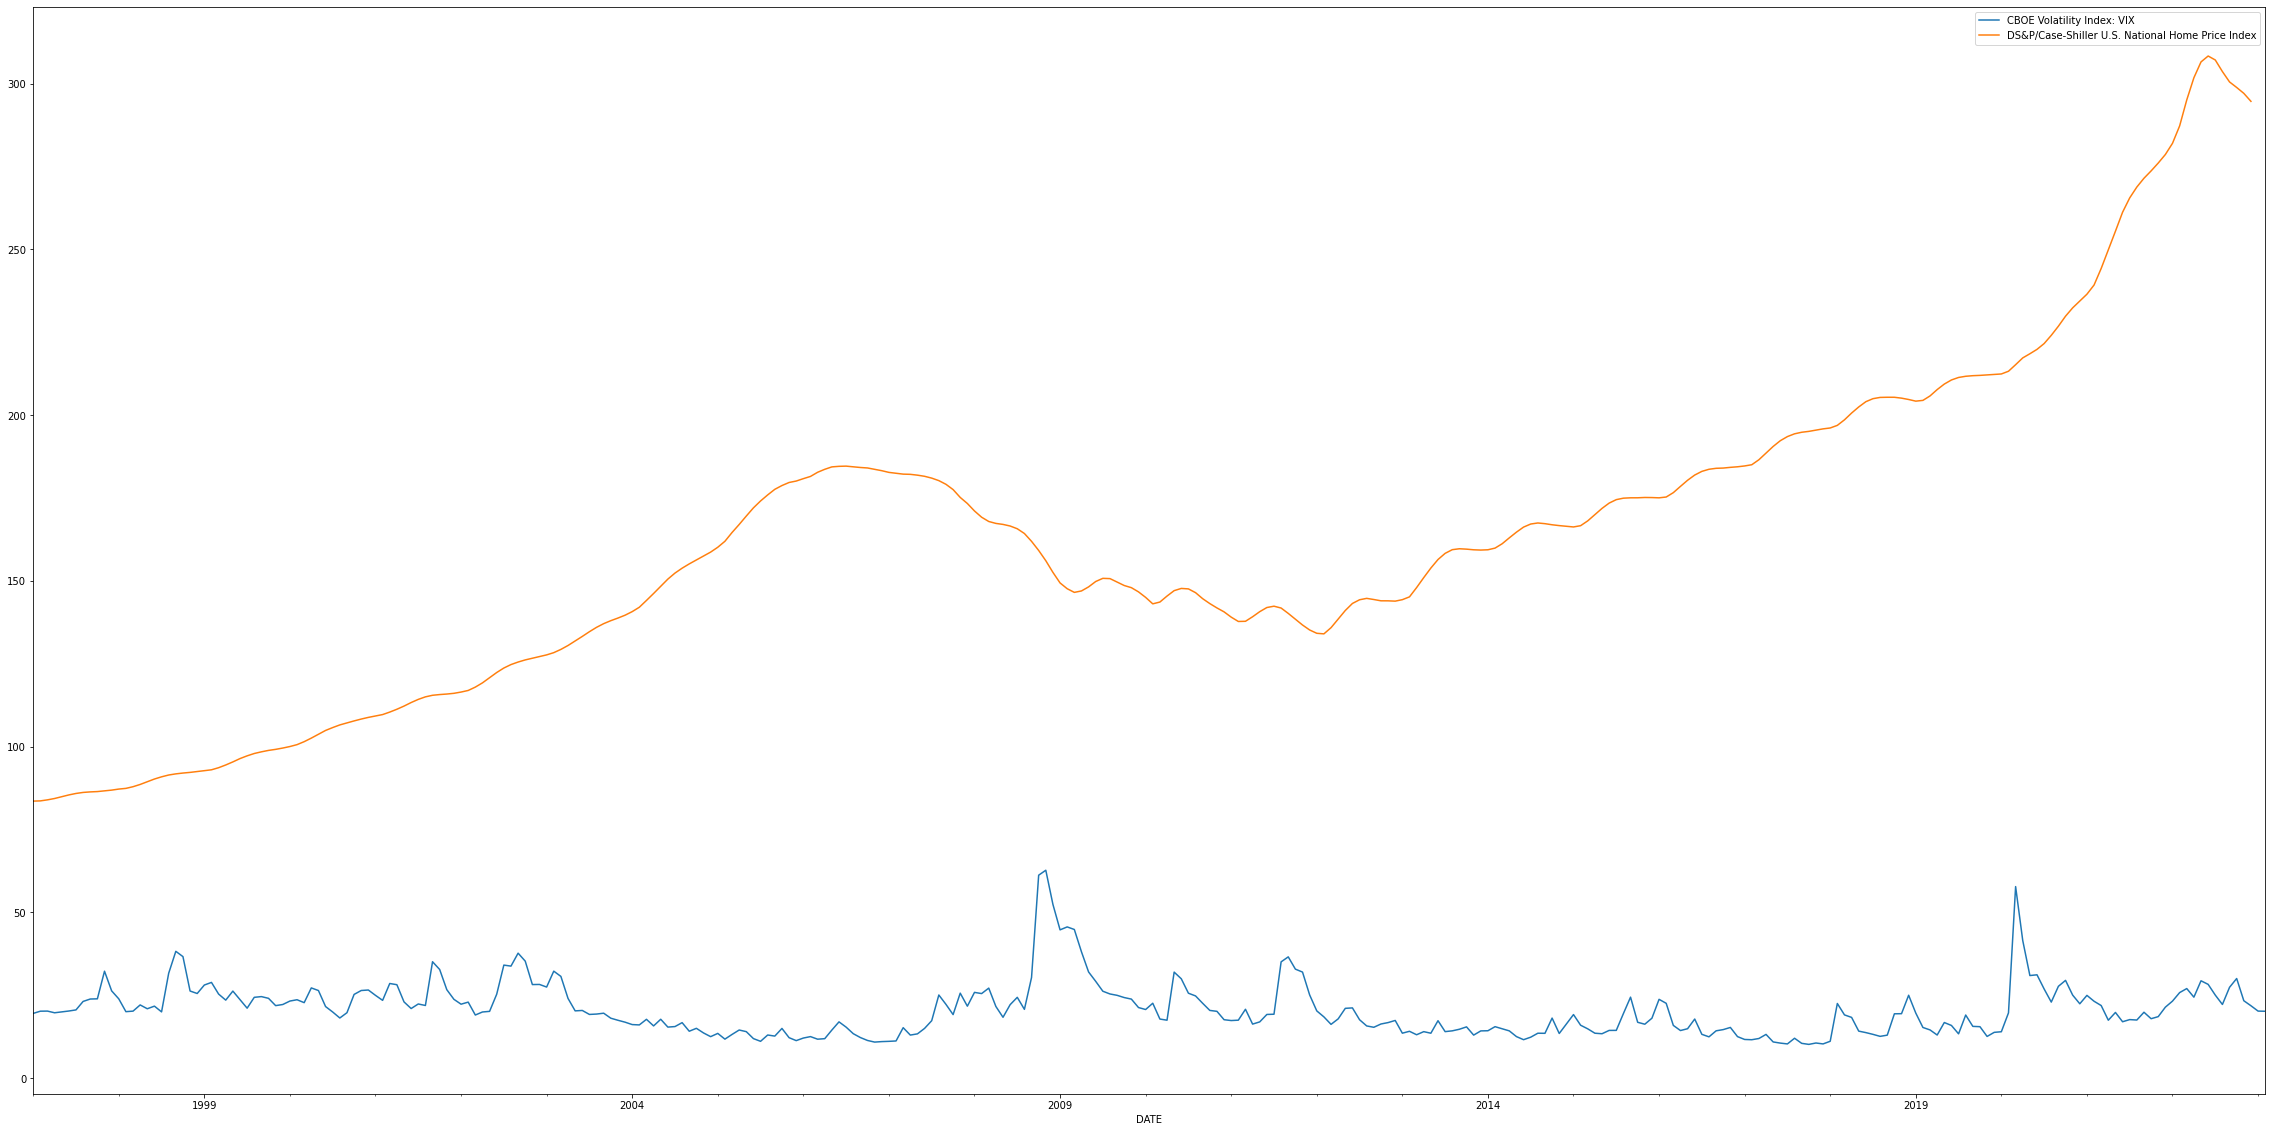

In [12]:
df3.plot.line(figsize=(40,20))

<Axes: title={'center': 'GDP v. Nasdaq Correlation Scatterplot'}, xlabel='NASDAQ Composite Index', ylabel='Real Gross Domestic Product'>

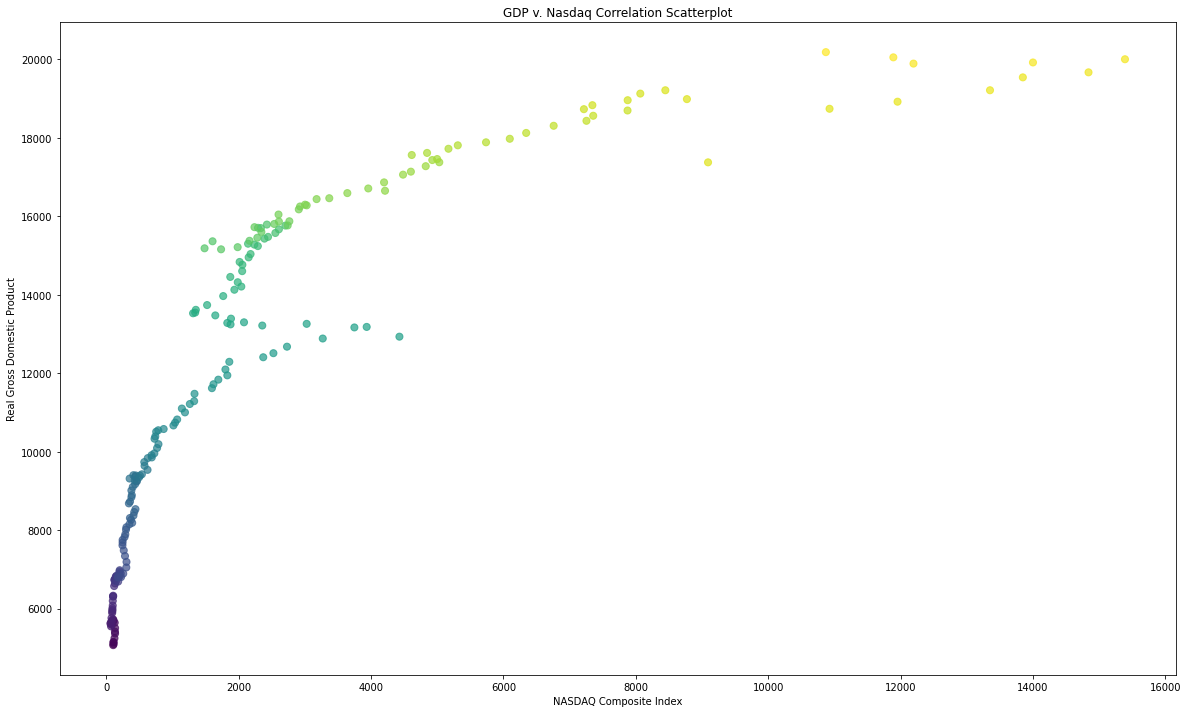

In [13]:
df2.plot.scatter(title='GDP v. Nasdaq Correlation Scatterplot',
                 figsize=(20,12),
                x=df2.columns[0],
                y=df2.columns[1],
                colormap='viridis',
                c=df2.index,
                s=50,
                alpha=.7)

2. Create a correlation matrix for quarterly observations of Nominal GDP, Real GDP, the Price Level (CPI or GDP Deflator), the quantity of currency in circulation and the federal funds rate for as large of a date range as possible. Then, calculate the year-over-year percent change for each each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.

How has the correlation between each variable changed? Why do you think the correlation changes after calculate the year-over-year percent change?

In [14]:
def corr_matrix_heatmap(data, pp=None, dim=20):
    #Create a figure to visualize a corr matrix
    fig, ax = plt.subplots(figsize=(dim, dim))
    # use ax.imshow() to create a heatmap of correlation values
    # seismic mapping shows negative values as blue and positive values as red
    im = ax.imshow(data, norm=plt.cm.colors.Normalize(-1, 1), cmap="seismic")
    # create a list of labels, stacking each word in a label by replacing " "
    # with "\n"
    labels = data.keys()
    num_vars = len(labels)
    tick_labels = [label.replace(" ", "\n") for label in labels]
    # adjust font size according to the number of variables visualized
    tick_font_size = 120 / num_vars
    val_font_size = 200 / num_vars
    plt.rcParams.update({'font.size': tick_font_size})
    # prepare space for label of each column
    x_ticks = np.arange(num_vars)
    # select labels and rotate them 90 degrees so that they are vertical
    plt.xticks(x_ticks, tick_labels, fontsize=tick_font_size, color='k')
    # prepare space for label of each row
    y_ticks = np.arange(len(labels))
    # select labels
    plt.yticks(y_ticks, tick_labels, fontsize=tick_font_size)
    # show values in each tile of the heatmap
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(i,
                           j,
                           str(round(data.values[i][j], 2)),
                           fontsize=val_font_size,
                           ha="center",
                           va="center",
                           color="w")
    #Create title with Times New Roman Font
    title_font = {"fontname": "Garamond"}  # TNR is dull and outdated
    plt.title("Correlation", fontsize=50, **title_font)
    #Call scale to show value of colors
    cbar = fig.colorbar(im)
    plt.show()
    if pp != None:
        pp.savefig(fig, bbox_inches='tight')
    plt.close()

In [35]:
data_codes = {"Real Gross Domestic Product": "GDPC1",
              "Gross Domestic Product": "GDP",
          "Consumer Price Index for All Urban Consumers: All Items in U.S. City Average": "CPIAUCSL",
              "Currency in Circulation":"CURRCIR",
              "Federal Funds Effective Rate":"FEDFUNDS"
              }
start = datetime.datetime(1800,1,1)
newdf = gather_data(data_codes, start, freq = 'Q')
newdf.dropna(how='any')

,Real Gross Domestic Product,Gross Domestic Product,Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,Currency in Circulation,Federal Funds Effective Rate
DATE,,,,,
1954-09-30,2684.434,390.996,26.840000,29.951667,1.030000
1954-12-31,2736.960,399.734,26.756667,30.371333,0.986667
1955-03-31,2815.134,413.073,26.793333,29.894667,1.343333
1955-06-30,2860.942,421.532,26.756667,29.906000,1.500000
1955-09-30,2899.578,430.221,26.776667,30.331000,1.940000
...,...,...,...,...,...
2021-12-31,20006.181,24349.121,278.706667,2212.581333,0.080000
2022-03-31,19924.088,24740.480,284.893667,2241.041667,0.120000
2022-06-30,19895.271,25248.476,291.535667,2273.359667,0.770000


In [36]:
newdf.rename(
    columns={"Consumer Price Index for All Urban Consumers: All Items in U.S. City Average":"CPI"}, inplace=True)

In [37]:
newdf.dropna(how="any")

,Real Gross Domestic Product,Gross Domestic Product,CPI,Currency in Circulation,Federal Funds Effective Rate
DATE,,,,,
1954-09-30,2684.434,390.996,26.840000,29.951667,1.030000
1954-12-31,2736.960,399.734,26.756667,30.371333,0.986667
1955-03-31,2815.134,413.073,26.793333,29.894667,1.343333
1955-06-30,2860.942,421.532,26.756667,29.906000,1.500000
1955-09-30,2899.578,430.221,26.776667,30.331000,1.940000
...,...,...,...,...,...
2021-12-31,20006.181,24349.121,278.706667,2212.581333,0.080000
2022-03-31,19924.088,24740.480,284.893667,2241.041667,0.120000
2022-06-30,19895.271,25248.476,291.535667,2273.359667,0.770000


In [38]:
newdf = newdf.dropna(how="any").iloc[1::4, :]

In [39]:
pctdf=newdf.pct_change().mul(100)

In [40]:
pctdf.rename(columns={
        "Real Gross Domestic Product":"Real Gross Domestic Product % Change",
        "Gross Domestic Product":"Gross Domestic Product % Change",
        "Currency in Circulation":"Currency in Circulation % Change",
        "CPI":"CPI % Change",
        "Federal Funds Effective Rate":"Federal Funds Effective Rate % Change"}, inplace=True)

In [41]:
pctdf

,Real Gross Domestic Product % Change,Gross Domestic Product % Change,CPI % Change,Currency in Circulation % Change,Federal Funds Effective Rate % Change
DATE,,,,,
1954-12-31,NaN,NaN,NaN,NaN,NaN
1955-12-31,6.577553,9.345715,0.373739,1.617754,138.851351
1956-12-31,1.996034,5.346929,2.581606,1.348987,24.186704
1957-12-31,0.355135,3.127504,3.085299,0.574400,11.161731
1958-12-31,2.658137,5.199594,1.913146,1.183564,-33.504098
...,...,...,...,...,...
2018-12-31,2.312584,4.647050,2.213519,6.667177,84.487535
2019-12-31,2.572631,4.261739,2.048453,4.917403,-25.975976
2020-12-31,-1.516620,-0.008412,1.224176,15.273157,-94.523327


In [42]:
newdf

,Real Gross Domestic Product,Gross Domestic Product,CPI,Currency in Circulation,Federal Funds Effective Rate
DATE,,,,,
1954-12-31,2736.960,399.734,26.756667,30.371333,0.986667
1955-12-31,2916.985,437.092,26.856667,30.862667,2.356667
1956-12-31,2975.209,460.463,27.550000,31.279000,2.926667
1957-12-31,2985.775,474.864,28.400000,31.458667,3.253333
1958-12-31,3065.141,499.555,28.943333,31.831000,2.163333
...,...,...,...,...,...
2018-12-31,18733.741,20819.269,252.711000,1699.542000,2.220000
2019-12-31,19215.691,21706.532,257.887667,1783.115333,1.643333
2020-12-31,18924.262,21704.706,261.044667,2055.453333,0.090000


In [43]:
newdf = pd.concat([newdf,pctdf],axis=1)

In [44]:
newdf

,Real Gross Domestic Product,Gross Domestic Product,CPI,Currency in Circulation,Federal Funds Effective Rate,Real Gross Domestic Product % Change,Gross Domestic Product % Change,CPI % Change,Currency in Circulation % Change,Federal Funds Effective Rate % Change
DATE,,,,,,,,,,
1954-12-31,2736.960,399.734,26.756667,30.371333,0.986667,NaN,NaN,NaN,NaN,NaN
1955-12-31,2916.985,437.092,26.856667,30.862667,2.356667,6.577553,9.345715,0.373739,1.617754,138.851351
1956-12-31,2975.209,460.463,27.550000,31.279000,2.926667,1.996034,5.346929,2.581606,1.348987,24.186704
1957-12-31,2985.775,474.864,28.400000,31.458667,3.253333,0.355135,3.127504,3.085299,0.574400,11.161731
1958-12-31,3065.141,499.555,28.943333,31.831000,2.163333,2.658137,5.199594,1.913146,1.183564,-33.504098
...,...,...,...,...,...,...,...,...,...,...
2018-12-31,18733.741,20819.269,252.711000,1699.542000,2.220000,2.312584,4.647050,2.213519,6.667177,84.487535
2019-12-31,19215.691,21706.532,257.887667,1783.115333,1.643333,2.572631,4.261739,2.048453,4.917403,-25.975976
2020-12-31,18924.262,21704.706,261.044667,2055.453333,0.090000,-1.516620,-0.008412,1.224176,15.273157,-94.523327


In [45]:
corrdf = newdf.corr().round(2)
corrdf

,Real Gross Domestic Product,Gross Domestic Product,CPI,Currency in Circulation,Federal Funds Effective Rate,Real Gross Domestic Product % Change,Gross Domestic Product % Change,CPI % Change,Currency in Circulation % Change,Federal Funds Effective Rate % Change
Real Gross Domestic Product,1.00,0.98,0.99,0.93,-0.45,-0.28,-0.43,-0.21,0.18,0.24
Gross Domestic Product,0.98,1.00,0.98,0.98,-0.52,-0.28,-0.44,-0.24,0.11,0.32
CPI,0.99,0.98,1.00,0.92,-0.44,-0.30,-0.46,-0.22,0.17,0.25
Currency in Circulation,0.93,0.98,0.92,1.00,-0.53,-0.27,-0.38,-0.20,0.11,0.37
Federal Funds Effective Rate,-0.45,-0.52,-0.44,-0.53,1.00,0.04,0.57,0.76,0.23,-0.03
Real Gross Domestic Product % Change,-0.28,-0.28,-0.30,-0.27,0.04,1.00,0.66,-0.19,-0.04,-0.08
Gross Domestic Product % Change,-0.43,-0.44,-0.46,-0.38,0.57,0.66,1.00,0.57,0.19,0.07
CPI % Change,-0.21,-0.24,-0.22,-0.20,0.76,-0.19,0.57,1.00,0.33,0.15
Currency in Circulation % Change,0.18,0.11,0.17,0.11,0.23,-0.04,0.19,0.33,1.00,-0.14
Federal Funds Effective Rate % Change,0.24,0.32,0.25,0.37,-0.03,-0.08,0.07,0.15,-0.14,1.00


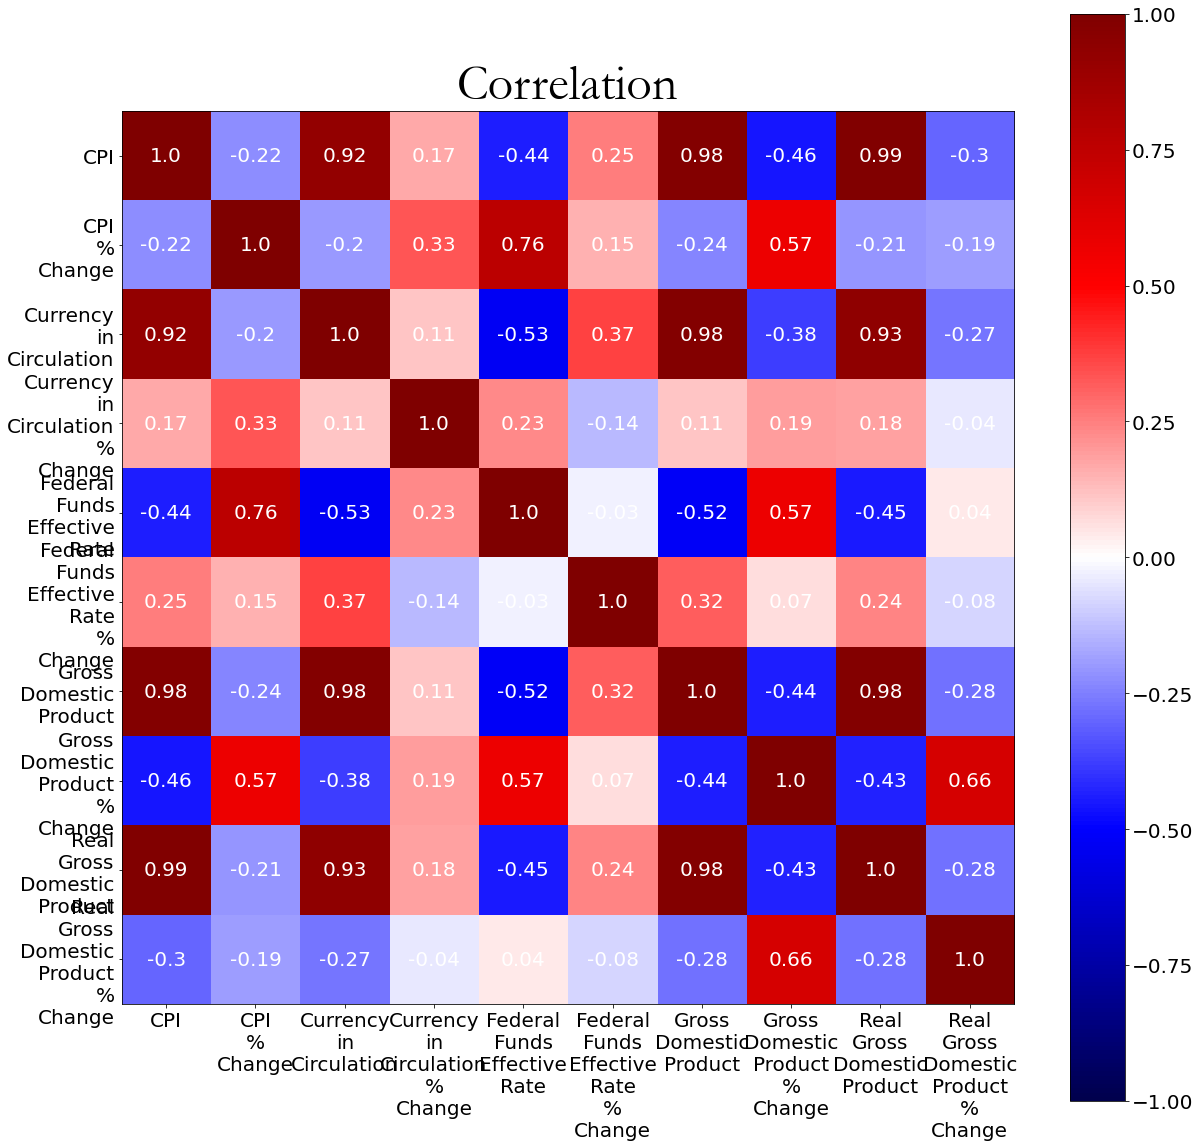

In [56]:
def corr_matrix_heatmap(data, pp=None, dim=20):
    #Create a figure to visualize a corr matrix
    fig, ax = plt.subplots(figsize=(dim, dim))
    # use ax.imshow() to create a heatmap of correlation values
    # seismic mapping shows negative values as blue and positive values as red
    im = ax.imshow(data, norm=plt.cm.colors.Normalize(-1, 1), cmap="seismic")
    # create a list of labels, stacking each word in a label by replacing " "
    # with "\n"
    labels = data.keys()
    num_vars = len(labels)
    tick_labels = [label.replace(" ", "\n") for label in labels]
    # adjust font size according to the number of variables visualized
    tick_font_size = 200 / num_vars
    val_font_size = 200 / num_vars
    plt.rcParams.update({'font.size': tick_font_size})
    # prepare space for label of each column
    x_ticks = np.arange(num_vars)
    # select labels and rotate them 90 degrees so that they are vertical
    plt.xticks(x_ticks, tick_labels, fontsize=tick_font_size, color='k')
    # prepare space for label of each row
    y_ticks = np.arange(len(labels))
    # select labels
    plt.yticks(y_ticks, tick_labels, fontsize=tick_font_size)
    # show values in each tile of the heatmap
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(i,
                           j,
                           str(round(data.values[i][j], 2)),
                           fontsize=val_font_size,
                           ha="center",
                           va="center",
                           color="w")
    #Create title with Times New Roman Font
    title_font = {"fontname": "Garamond"}  # TNR is dull and outdated
    plt.title("Correlation", fontsize=50, **title_font)
    #Call scale to show value of colors
    cbar = fig.colorbar(im)
    plt.show()
    if pp != None:
        pp.savefig(fig, bbox_inches='tight')
    plt.close()


corr_matrix_heatmap(corrdf.sort_index(axis=1).sort_index(axis=0), pp=None)